In [66]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("mergedData.csv")
data = data.dropna()

selected_features1 = data.iloc[:,12:21]
selected_features2 = data.iloc[:,22:47]
selected_features = pd.merge(selected_features1, selected_features2, left_index=True, right_index=True)
#print(selected_features.columns)

data = selected_features

X = data.iloc[:,12:47]  #independent columns
y = data.iloc[:,8] # box office

# X.to_csv("test.csv")
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs      Score
5     adventure  75.528919
4        action  73.319136
10       sci-fi  48.434810
7       fantasy  45.800158
15        sport  40.592757
19  documentary  39.255161
3       romance  33.792407
8        family  30.908912
16      history  30.649794
9       mystery  29.119958


[0.0811907  0.09222601 0.08885296 0.04432806 0.07095689 0.04767711
 0.05431148 0.07038507 0.04036664 0.06632464 0.04361099 0.03232649
 0.04237623 0.03576569 0.04707669 0.01991659 0.03289035 0.02437521
 0.02837442 0.00682945 0.02907564 0.00076271]


C:\Users\monol\Anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


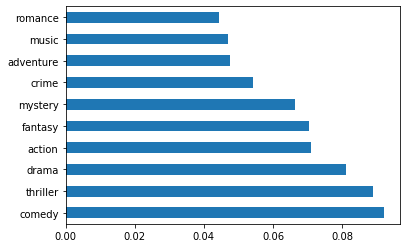

In [69]:

data = pd.read_csv("mergedData.csv")
data = data.dropna()

selected_features1 = data.iloc[:,12:21]
selected_features2 = data.iloc[:,22:47]
selected_features = pd.merge(selected_features1, selected_features2, left_index=True, right_index=True)
#print(selected_features.columns)

data = selected_features

X = data.iloc[:,12:47]  #independent columns
y = data.iloc[:,8] # box office

from sklearn.ensemble import ExtraTreesClassifier
# %matplotlib inline
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()